=== PROJETO IA - ANÁLISE DE E-COMMERCE BRASILEIRO ===
Autor: [SEU NOME]
Data: 18/09/2025 18:40
Disciplina: Inteligência Artificial - 7ºJ SI

📁 Carregando datasets...
✅ olist_customers_dataset.csv: 99441 registros
✅ olist_geolocation_dataset.csv: 1000163 registros
✅ olist_order_items_dataset.csv: 112650 registros
✅ olist_order_payments_dataset.csv: 103886 registros
✅ olist_order_reviews_dataset.csv: 99224 registros
✅ olist_orders_dataset.csv: 99441 registros
✅ olist_products_dataset.csv: 32951 registros
✅ olist_sellers_dataset.csv: 3095 registros
✅ product_category_name_translation.csv: 71 registros

🎉 Total: 9 datasets carregados com sucesso!

📊 ANÁLISE EXPLORATÓRIA INICIAL

📋 Dataset: CUSTOMERS
   • Linhas: 99,441
   • Colunas: 5
   • Dados faltantes: 0.0%
   • Colunas: customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state

📋 Dataset: GEOLOCATION
   • Linhas: 1,000,163
   • Colunas: 5
   • Dados faltantes: 0.0%
   • Colunas: geolocation_zip_code_pref

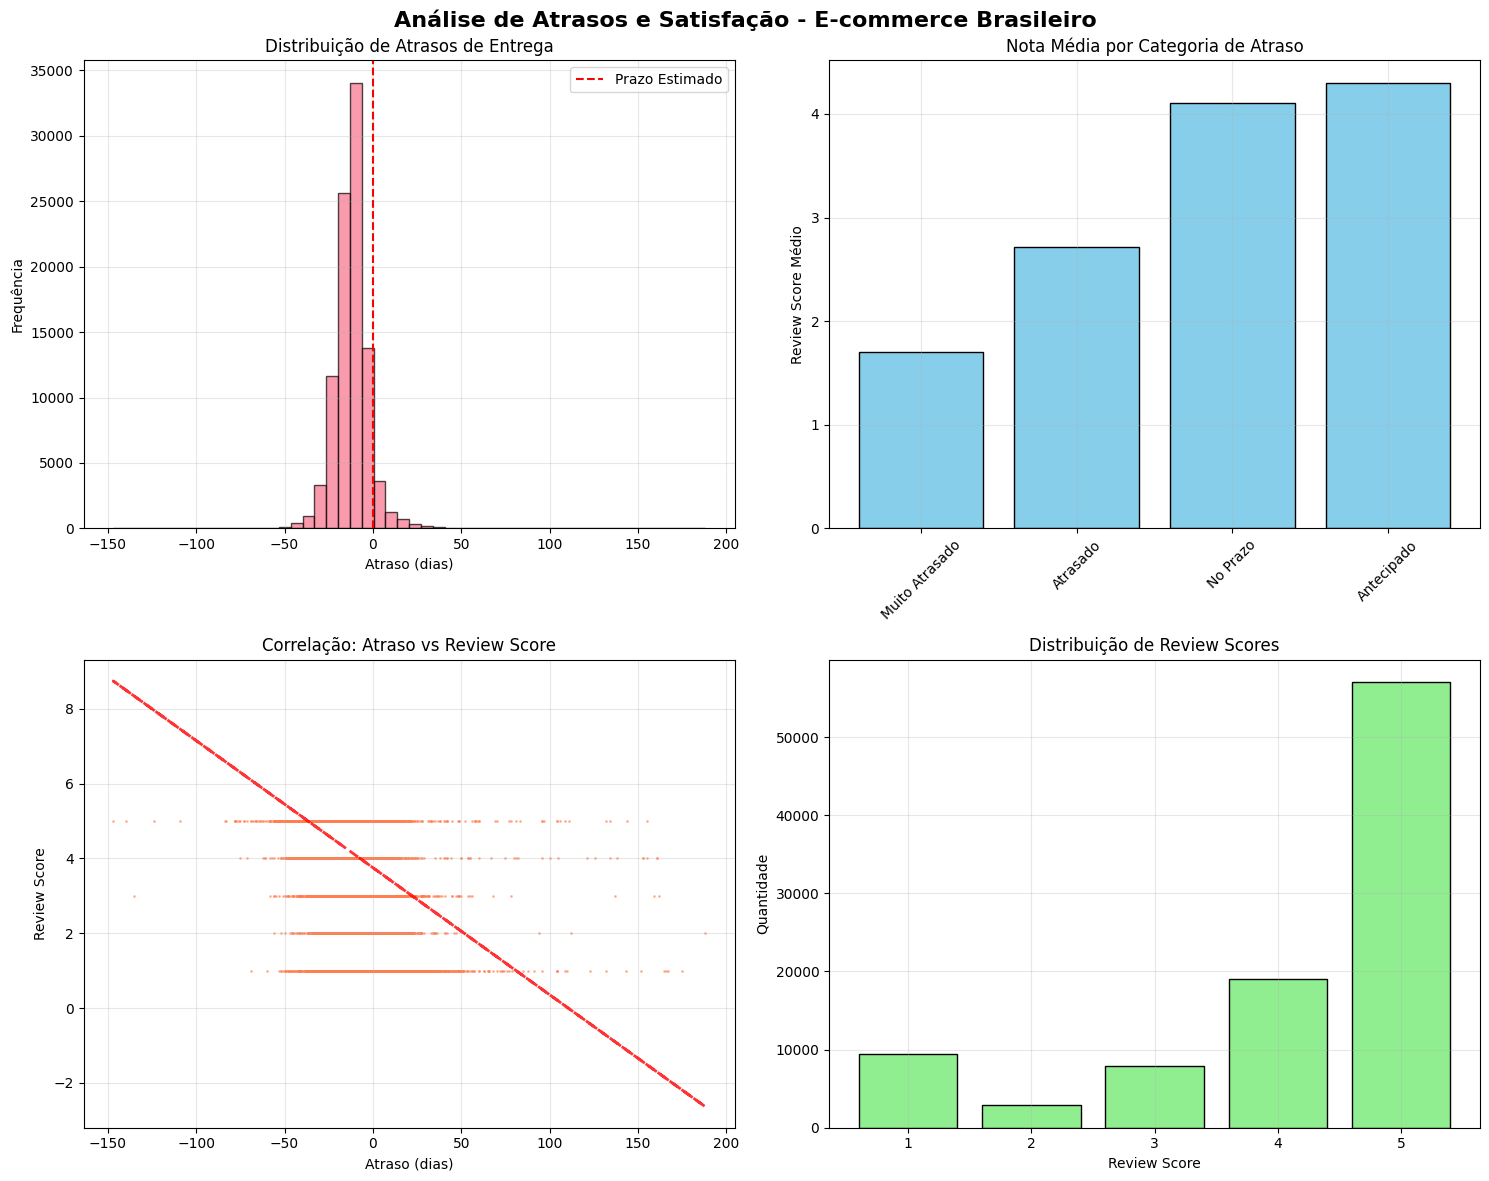

✅ Gráfico salvo como: analise_atrasos_satisfacao.png

💾 EXPORTANDO RESULTADOS
✅ dataset_processado_atrasos.csv
✅ estatisticas_gerais.csv
✅ analise_por_categoria_atraso.csv
✅ distribuicao_reviews_por_atraso.csv
✅ target_modelagem_stats.csv
✅ resumo_executivo.txt

🎉 Todos os arquivos exportados para /content/
📁 Arquivos gerados:
   • dataset_processado_atrasos.csv (dados limpos para N2)
   • estatisticas_gerais.csv (números-chave)
   • analise_por_categoria_atraso.csv (tabela principal)
   • distribuicao_reviews_por_atraso.csv (crosstab)
   • target_modelagem_stats.csv (balanceamento do target)
   • analise_atrasos_satisfacao.png (gráficos)
   • resumo_executivo.txt (síntese para relatório)

🎉 ANÁLISE CONCLUÍDA COM SUCESSO!
✅ Dados processados e exportados
✅ Visualizações criadas
✅ Relatórios gerados

📝 Próximos passos:
1. Baixe os arquivos CSV gerados
2. Use os dados no seu relatório N1
3. Para N2: implemente modelos de ML com dataset_processado_atrasos.csv


In [1]:
# =============================================================================
# PROJETO IA - ANÁLISE DE ATRASOS E SATISFAÇÃO NO E-COMMERCE BRASILEIRO
# Dataset: Brazilian E-Commerce Public Dataset by Olist
# Objetivo: Processar dados para análise de atrasos de entrega e reviews (N1)
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizações
plt.style.use('default')
sns.set_palette("husl")

print("=== PROJETO IA - ANÁLISE DE E-COMMERCE BRASILEIRO ===")
print("Autor: [SEU NOME]")
print("Data:", datetime.now().strftime("%d/%m/%Y %H:%M"))
print("Disciplina: Inteligência Artificial - 7ºJ SI")
print("="*60)

# =============================================================================
# 1. CARREGAR DADOS
# =============================================================================

def load_olist_data():
    """
    Carrega todos os datasets do Olist do diretório /content/
    Retorna dicionário com todos os DataFrames
    """
    try:
        print("\n📁 Carregando datasets...")

        data = {}
        files = {
            'customers': 'olist_customers_dataset.csv',
            'geolocation': 'olist_geolocation_dataset.csv',
            'order_items': 'olist_order_items_dataset.csv',
            'order_payments': 'olist_order_payments_dataset.csv',
            'order_reviews': 'olist_order_reviews_dataset.csv',
            'orders': 'olist_orders_dataset.csv',
            'products': 'olist_products_dataset.csv',
            'sellers': 'olist_sellers_dataset.csv',
            'category_translation': 'product_category_name_translation.csv'
        }

        for key, filename in files.items():
            data[key] = pd.read_csv(f'/content/{filename}')
            print(f"✅ {filename}: {len(data[key])} registros")

        print(f"\n🎉 Total: {len(data)} datasets carregados com sucesso!")
        return data

    except FileNotFoundError as e:
        print(f"❌ Erro: {e}")
        print("\n🔍 INSTRUÇÕES:")
        print("1. Faça upload dos arquivos CSV para /content/")
        print("2. Ou use: from google.colab import files; files.upload()")
        return None

# =============================================================================
# 2. ANÁLISE EXPLORATÓRIA INICIAL
# =============================================================================

def exploratory_analysis(data):
    """
    Realiza análise exploratória inicial dos dados
    """
    print("\n" + "="*60)
    print("📊 ANÁLISE EXPLORATÓRIA INICIAL")
    print("="*60)

    summary_data = []

    for name, df in data.items():
        missing_pct = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100

        print(f"\n📋 Dataset: {name.upper()}")
        print(f"   • Linhas: {len(df):,}")
        print(f"   • Colunas: {len(df.columns)}")
        print(f"   • Dados faltantes: {missing_pct:.1f}%")
        print(f"   • Colunas: {', '.join(df.columns[:5])}{'...' if len(df.columns) > 5 else ''}")

        summary_data.append({
            'Dataset': name,
            'Registros': len(df),
            'Colunas': len(df.columns),
            'Missing_Pct': round(missing_pct, 1)
        })

    # Criar resumo
    summary_df = pd.DataFrame(summary_data)
    summary_df.to_csv('/content/dataset_summary.csv', index=False)

    return summary_df

# =============================================================================
# 3. PROCESSAMENTO PRINCIPAL - ATRASOS E REVIEWS
# =============================================================================

def process_delivery_analysis(data):
    """
    Processa dados para análise de atrasos de entrega e satisfação
    Foco: identificar padrões de atraso e impacto nas avaliações
    """
    print("\n" + "="*60)
    print("🔄 PROCESSANDO DADOS PARA ANÁLISE DE ATRASOS")
    print("="*60)

    orders = data['orders'].copy()
    reviews = data['order_reviews'].copy()

    # 1. Processar datas
    print("\n📅 Processando datas...")
    date_cols = ['order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date']

    for col in date_cols:
        if col in orders.columns:
            orders[col] = pd.to_datetime(orders[col], errors='coerce')

    # 2. Calcular métricas de entrega
    print("⏰ Calculando métricas de tempo...")

    # Tempo total de entrega (compra → entrega)
    orders['delivery_time_days'] = (
        orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
    ).dt.days

    # Atraso em dias (real vs estimado)
    orders['delay_days'] = (
        orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']
    ).dt.days

    # Classificar atraso
    orders['delay_category'] = orders['delay_days'].apply(
        lambda x: 'Muito Atrasado' if x > 7 else
                 'Atrasado' if x > 0 else
                 'No Prazo' if x >= -3 else
                 'Antecipado' if not pd.isna(x) else 'Sem Info'
    )

    # 3. Merge com reviews
    print("🔗 Conectando com avaliações...")
    delivery_analysis = pd.merge(
        orders[['order_id', 'order_status', 'delivery_time_days', 'delay_days', 'delay_category']],
        reviews[['order_id', 'review_score', 'review_comment_message']],
        on='order_id',
        how='left'
    )

    # 4. Filtrar apenas pedidos entregues com dados completos
    delivery_analysis = delivery_analysis[
        (delivery_analysis['order_status'] == 'delivered') &
        (delivery_analysis['delay_days'].notna()) &
        (delivery_analysis['review_score'].notna())
    ].copy()

    print(f"✅ Dataset final: {len(delivery_analysis):,} pedidos com dados completos")

    return delivery_analysis

# =============================================================================
# 4. ANÁLISES ESTATÍSTICAS PARA O RELATÓRIO
# =============================================================================

def generate_report_statistics(delivery_data):
    """
    Gera estatísticas essenciais para o relatório N1
    """
    print("\n" + "="*60)
    print("📈 GERANDO ESTATÍSTICAS PARA RELATÓRIO")
    print("="*60)

    results = {}

    # 1. ESTATÍSTICAS GERAIS
    print("\n1️⃣ Estatísticas Gerais:")
    total_orders = len(delivery_data)
    avg_delivery_time = delivery_data['delivery_time_days'].mean()
    avg_delay = delivery_data['delay_days'].mean()
    avg_review_score = delivery_data['review_score'].mean()

    general_stats = {
        'total_pedidos': total_orders,
        'tempo_entrega_medio_dias': round(avg_delivery_time, 1),
        'atraso_medio_dias': round(avg_delay, 1),
        'nota_media_review': round(avg_review_score, 2)
    }

    for key, value in general_stats.items():
        print(f"   • {key}: {value:,}")

    results['general_stats'] = pd.DataFrame([general_stats])

    # 2. ANÁLISE POR CATEGORIA DE ATRASO
    print("\n2️⃣ Análise por Categoria de Atraso:")
    delay_analysis = delivery_data.groupby('delay_category').agg({
        'order_id': 'count',
        'review_score': ['mean', 'std'],
        'delay_days': ['mean', 'min', 'max']
    }).round(2)

    delay_analysis.columns = ['qtd_pedidos', 'review_media', 'review_std',
                             'delay_medio', 'delay_min', 'delay_max']
    delay_analysis['percentual'] = (delay_analysis['qtd_pedidos'] / total_orders * 100).round(1)

    print(delay_analysis)
    results['delay_analysis'] = delay_analysis

    # 3. CORRELAÇÃO ATRASO vs SATISFAÇÃO
    print("\n3️⃣ Correlação Atraso vs Satisfação:")
    correlation = delivery_data['delay_days'].corr(delivery_data['review_score'])
    print(f"   • Correlação delay_days vs review_score: {correlation:.3f}")

    # 4. DISTRIBUIÇÃO DE REVIEWS POR FAIXA DE ATRASO
    print("\n4️⃣ Reviews por Faixa de Atraso:")
    review_distribution = pd.crosstab(
        delivery_data['delay_category'],
        delivery_data['review_score'],
        normalize='index'
    ).round(3) * 100

    print("Distribuição percentual de notas por categoria:")
    print(review_distribution)
    results['review_distribution'] = review_distribution

    # 5. ESTATÍSTICAS PARA MODELAGEM (N2)
    print("\n5️⃣ Preparando para Modelagem:")

    # Criar target binário para classificação: review ruim (1-3) vs boa (4-5)
    delivery_data['review_ruim'] = (delivery_data['review_score'] <= 3).astype(int)

    # Estatísticas do target
    review_ruim_stats = delivery_data['review_ruim'].value_counts()
    print(f"   • Reviews ruins (1-3): {review_ruim_stats[1]:,} ({review_ruim_stats[1]/len(delivery_data)*100:.1f}%)")
    print(f"   • Reviews boas (4-5): {review_ruim_stats[0]:,} ({review_ruim_stats[0]/len(delivery_data)*100:.1f}%)")

    results['model_target_stats'] = pd.DataFrame({
        'categoria': ['Review Ruim (1-3)', 'Review Boa (4-5)'],
        'quantidade': [review_ruim_stats[1], review_ruim_stats[0]],
        'percentual': [review_ruim_stats[1]/len(delivery_data)*100,
                      review_ruim_stats[0]/len(delivery_data)*100]
    })

    return results, delivery_data

# =============================================================================
# 5. VISUALIZAÇÕES PARA O RELATÓRIO
# =============================================================================

def create_visualizations(delivery_data, results):
    """
    Cria visualizações essenciais para o relatório
    """
    print("\n" + "="*60)
    print("📊 CRIANDO VISUALIZAÇÕES")
    print("="*60)

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Análise de Atrasos e Satisfação - E-commerce Brasileiro', fontsize=16, fontweight='bold')

    # 1. Distribuição de Atrasos
    axes[0,0].hist(delivery_data['delay_days'], bins=50, edgecolor='black', alpha=0.7)
    axes[0,0].axvline(0, color='red', linestyle='--', label='Prazo Estimado')
    axes[0,0].set_title('Distribuição de Atrasos de Entrega')
    axes[0,0].set_xlabel('Atraso (dias)')
    axes[0,0].set_ylabel('Frequência')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # 2. Review Score por Categoria de Atraso
    delay_review = delivery_data.groupby('delay_category')['review_score'].mean().sort_values()
    axes[0,1].bar(range(len(delay_review)), delay_review.values, color='skyblue', edgecolor='black')
    axes[0,1].set_xticks(range(len(delay_review)))
    axes[0,1].set_xticklabels(delay_review.index, rotation=45)
    axes[0,1].set_title('Nota Média por Categoria de Atraso')
    axes[0,1].set_ylabel('Review Score Médio')
    axes[0,1].grid(True, alpha=0.3)

    # 3. Correlação Atraso vs Review
    axes[1,0].scatter(delivery_data['delay_days'], delivery_data['review_score'],
                     alpha=0.5, s=1, color='coral')
    axes[1,0].set_title('Correlação: Atraso vs Review Score')
    axes[1,0].set_xlabel('Atraso (dias)')
    axes[1,0].set_ylabel('Review Score')
    axes[1,0].grid(True, alpha=0.3)

    # Linha de tendência
    z = np.polyfit(delivery_data['delay_days'], delivery_data['review_score'], 1)
    p = np.poly1d(z)
    axes[1,0].plot(delivery_data['delay_days'], p(delivery_data['delay_days']),
                  "r--", alpha=0.8, linewidth=2)

    # 4. Distribuição de Review Scores
    review_counts = delivery_data['review_score'].value_counts().sort_index()
    axes[1,1].bar(review_counts.index, review_counts.values, color='lightgreen', edgecolor='black')
    axes[1,1].set_title('Distribuição de Review Scores')
    axes[1,1].set_xlabel('Review Score')
    axes[1,1].set_ylabel('Quantidade')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('/content/analise_atrasos_satisfacao.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Gráfico salvo como: analise_atrasos_satisfacao.png")

# =============================================================================
# 6. EXPORTAR RESULTADOS
# =============================================================================

def export_results(delivery_data, results):
    """
    Exporta todos os resultados em arquivos CSV para uso no relatório
    """
    print("\n" + "="*60)
    print("💾 EXPORTANDO RESULTADOS")
    print("="*60)

    # 1. Dataset principal processado
    delivery_data.to_csv('/content/dataset_processado_atrasos.csv', index=False)
    print("✅ dataset_processado_atrasos.csv")

    # 2. Estatísticas gerais
    results['general_stats'].to_csv('/content/estatisticas_gerais.csv', index=False)
    print("✅ estatisticas_gerais.csv")

    # 3. Análise por categoria de atraso
    results['delay_analysis'].to_csv('/content/analise_por_categoria_atraso.csv')
    print("✅ analise_por_categoria_atraso.csv")

    # 4. Distribuição de reviews
    results['review_distribution'].to_csv('/content/distribuicao_reviews_por_atraso.csv')
    print("✅ distribuicao_reviews_por_atraso.csv")

    # 5. Stats para modelagem
    results['model_target_stats'].to_csv('/content/target_modelagem_stats.csv', index=False)
    print("✅ target_modelagem_stats.csv")

    # 6. Resumo executivo para relatório
    summary_report = f"""
RESUMO EXECUTIVO - ANÁLISE DE ATRASOS E SATISFAÇÃO
Dataset: Brazilian E-Commerce Public Dataset by Olist
Data da Análise: {datetime.now().strftime("%d/%m/%Y %H:%M")}

PRINCIPAIS DESCOBERTAS:
• Total de pedidos analisados: {len(delivery_data):,}
• Tempo médio de entrega: {delivery_data['delivery_time_days'].mean():.1f} dias
• Atraso médio: {delivery_data['delay_days'].mean():.1f} dias
• Nota média geral: {delivery_data['review_score'].mean():.2f}
• Correlação atraso vs satisfação: {delivery_data['delay_days'].corr(delivery_data['review_score']):.3f}

DISTRIBUIÇÃO DE ATRASOS:
{results['delay_analysis']['percentual'].to_string()}

IMPACTO NA SATISFAÇÃO:
• Reviews ruins (1-3): {(delivery_data['review_score'] <= 3).sum():,} ({(delivery_data['review_score'] <= 3).mean()*100:.1f}%)
• Reviews boas (4-5): {(delivery_data['review_score'] >= 4).sum():,} ({(delivery_data['review_score'] >= 4).mean()*100:.1f}%)

RECOMENDAÇÕES PARA MODELAGEM (N2):
1. Usar 'delay_days' como feature principal para previsão de atraso
2. Target binário: review_ruim (score 1-3) vs review_boa (score 4-5)
3. Features adicionais: delivery_time_days, sazonalidade, geolocalização
4. Algoritmos sugeridos: Random Forest, Gradient Boosting, Logistic Regression
    """

    with open('/content/resumo_executivo.txt', 'w', encoding='utf-8') as f:
        f.write(summary_report)
    print("✅ resumo_executivo.txt")

    print(f"\n🎉 Todos os arquivos exportados para /content/")
    print("📁 Arquivos gerados:")
    print("   • dataset_processado_atrasos.csv (dados limpos para N2)")
    print("   • estatisticas_gerais.csv (números-chave)")
    print("   • analise_por_categoria_atraso.csv (tabela principal)")
    print("   • distribuicao_reviews_por_atraso.csv (crosstab)")
    print("   • target_modelagem_stats.csv (balanceamento do target)")
    print("   • analise_atrasos_satisfacao.png (gráficos)")
    print("   • resumo_executivo.txt (síntese para relatório)")

# =============================================================================
# 7. EXECUÇÃO PRINCIPAL
# =============================================================================

def main():
    """
    Função principal - executa todo o pipeline de análise
    """
    try:
        # 1. Carregar dados
        data = load_olist_data()
        if data is None:
            return

        # 2. Análise exploratória
        summary = exploratory_analysis(data)

        # 3. Processamento principal
        delivery_data = process_delivery_analysis(data)

        # 4. Estatísticas para relatório
        results, delivery_data_final = generate_report_statistics(delivery_data)

        # 5. Visualizações
        create_visualizations(delivery_data_final, results)

        # 6. Exportar resultados
        export_results(delivery_data_final, results)

        print("\n" + "="*60)
        print("🎉 ANÁLISE CONCLUÍDA COM SUCESSO!")
        print("="*60)
        print("✅ Dados processados e exportados")
        print("✅ Visualizações criadas")
        print("✅ Relatórios gerados")
        print("\n📝 Próximos passos:")
        print("1. Baixe os arquivos CSV gerados")
        print("2. Use os dados no seu relatório N1")
        print("3. Para N2: implemente modelos de ML com dataset_processado_atrasos.csv")

    except Exception as e:
        print(f"❌ Erro durante execução: {e}")
        print("🔍 Verifique se todos os arquivos CSV foram carregados corretamente")

# EXECUTAR ANÁLISE
if __name__ == "__main__":
    main()

In [2]:
# Execute para baixar todos os arquivos gerados
from google.colab import files
import zipfile

# Criar ZIP com todos os resultados
with zipfile.ZipFile('/content/resultados_projeto_ia.zip', 'w') as zipf:
    files_to_zip = [
        'dataset_processado_atrasos.csv',
        'estatisticas_gerais.csv',
        'analise_por_categoria_atraso.csv',
        'distribuicao_reviews_por_atraso.csv',
        'target_modelagem_stats.csv',
        'analise_atrasos_satisfacao.png',
        'resumo_executivo.txt'
    ]

    for file in files_to_zip:
        if os.path.exists(f'/content/{file}'):
            zipf.write(f'/content/{file}', file)

print("📦 Baixando ZIP com todos os resultados...")
files.download('/content/resultados_projeto_ia.zip')


NameError: name 'os' is not defined